In [2]:
import pandas as pd
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
from scipy.stats import kurtosis
from tabulate import tabulate
import matplotlib as mat

In [3]:
df = pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


# TASK-1 : PRE PROCESSING THE DATA

In [3]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [4]:
df.shape

(10692, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [6]:
def seperate_data_types(df):
    categorical = []
    continous = []
    for column in df.columns:
        if df[column].dtypes == object:
            categorical.append(column)
        else:
            continous.append(column)
    return categorical,continous
categorical,continous = seperate_data_types(df)


from tabulate import tabulate
table = [categorical,continous]
print(tabulate({'Categorical': categorical,'Continous':continous}, headers =['categorical','continous']))

categorical    continous
-------------  -------------------
city           area
animal         rooms
furniture      bathroom
               parking spaces
               floor
               hoa (R$)
               rent amount (R$)
               property tax (R$)
               fire insurance (R$)
               total (R$)


In [7]:
def info_of_cat(col):
    print(f'Unique values in {col} are : {df[col].unique()}')
    print(f'mode of  {col} is : {df[col].mode()[0]}')
    print(f'total count of missing values in {col} is : {df[col].isnull().sum()}')

In [8]:
def info_of_numerical(col):
    print(f'the mean of the {col} are : {df[col].mean()}')
    print(f'the median of the {col} are : {df[col].median()}')
    print(f'mode of  {col} is : {df[col].mode()[0]}')
    print(f' standard deviation of  {col} is : {df[col].std()}')
    print(f'total count of missing values in {col} is : {df[col].isnull().sum()}')

In [9]:
info_of_cat('city')

Unique values in city are : ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
mode of  city is : São Paulo
total count of missing values in city is : 0


# TASK-2 : FIND OUT EXPENSIVE CITIES AND REMOVE FROM THE DATA

### most expensive cities visualization and then remove that expensive cities, start analysing the data

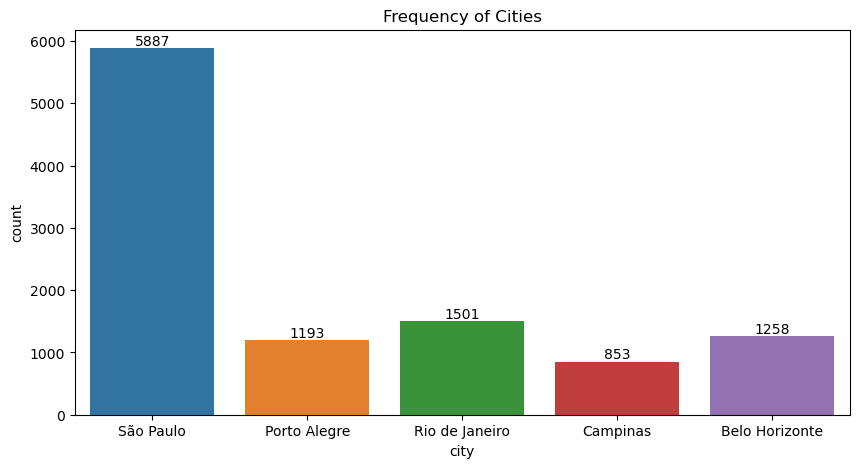

In [10]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title('Frequency of Cities')
sb.countplot(x= 'city' ,data = df)
for bar in ax.patches:
    value = f'{round(bar.get_height(),2)}'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height()  
    ax.annotate(value,(x,y), va = 'bottom',ha = 'center')
plt.show()

# Interpretation:-From above graph sao paulo and Ria de janeiro city are more expensive. For our analysis we remove these two cities and continue the our analysis.

In [4]:
df1 = df[(df['city']!='São Paulo') & (df['city']!='Rio de Janeiro') ]
df1

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447
10673,Porto Alegre,220,3,2,2,15,acept,not furnished,842,2400,117,36,3395
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419


# TASK-3 : CALCULATE CENTRAL TENDANCY CITYWISE ON NUMERICAL COLUMNS AND INTERPRETE IT.

# central tendency city wise

In [12]:
def ct(df,col1,col2):
    print(df.groupby(by=[col1])[[col2]].mean())
    print(df.groupby(by=[col1])[[col2]].median())
    print(pd.pivot_table(df, index=col1,values=col2, aggfunc=lambda x: x.mode()[0]))

In [13]:
ct(df1,'city','total (R$)')

                 total (R$)
city                       
Belo Horizonte  6315.242448
Campinas        3173.276671
Porto Alegre    2989.782900
                total (R$)
city                      
Belo Horizonte      3040.0
Campinas            2140.0
Porto Alegre        2211.0
                total (R$)
city                      
Belo Horizonte        1115
Campinas              1327
Porto Alegre          2633


# Interpretation:- there is difficult to plot a graph with total column because huge difference between min value and max value. so we do analysis on the basis of central tendency. by comparing these three city'Belo Horizonte' have highest values and 'Campinas' have lowest value. 

In [14]:
ct(df1,'city','rent amount (R$)')

                rent amount (R$)
city                            
Belo Horizonte       3664.127981
Campinas             2364.290739
Porto Alegre         2337.699916
                rent amount (R$)
city                            
Belo Horizonte            2300.0
Campinas                  1500.0
Porto Alegre              1650.0
                rent amount (R$)
city                            
Belo Horizonte              1100
Campinas                    1200
Porto Alegre                2200


# Interpretation:- citywise rental rate central tendency. Here also 'Campinas' is lowest. and 'Belo Horizonte' is highest median

In [15]:
ct(df1,'city','property tax (R$)')

                property tax (R$)
city                             
Belo Horizonte         272.782194
Campinas               147.657679
Porto Alegre           124.021794
                property tax (R$)
city                             
Belo Horizonte              147.0
Campinas                     75.0
Porto Alegre                 59.0
                property tax (R$)
city                             
Belo Horizonte                  0
Campinas                        0
Porto Alegre                    0


# Interpretation:- citywise property tax central tendency. Here also 'Porto Alegre' is lowest. and 'Belo Horizonte' is highest median

In [16]:
ct(df1,'city','hoa (R$)')

                   hoa (R$)
city                       
Belo Horizonte  2324.197138
Campinas         628.922626
Porto Alegre     491.618609
                hoa (R$)
city                    
Belo Horizonte     300.0
Campinas           485.0
Porto Alegre       350.0
                hoa (R$)
city                    
Belo Horizonte         0
Campinas               0
Porto Alegre           0


# Interpretation:- citywise HOA central tendency. Here also 'Porto Alegre' is lowest. and 'Belo Horizonte' is highest median

# TASK-4: CALCULATE MEASURES OF DISPERSION CITYWISE ON NUMERICAL COLUMNS AND INTERPRETE IT.

# measures of dispersion citywise

In [17]:
bh = df1[(df1['city']=='Belo Horizonte')]
cc= df1[(df1['city']=='Campinas')]
pa= df1[(df1['city']=='Porto Alegre')]

In [18]:
def md(df,col):# function it calculates var,sd,cv,skewness,min,max,mean etc
    print('variance ',df[col].var())
    print('SD       ', df[col].std())
    print('CV       ', (df[col].std()/df[col].mean())*100)
    print('Skewness ',df[col].skew())
    print(df[col].describe())

### Belo Horizonte

In [19]:
md(bh,'rent amount (R$)')

variance  12205694.016225182
SD        3493.664840282362
CV        95.34778420602987
Skewness  1.7350817305750454
count     1258.000000
mean      3664.127981
std       3493.664840
min        450.000000
25%       1250.000000
50%       2300.000000
75%       4600.000000
max      15000.000000
Name: rent amount (R$), dtype: float64


In [20]:
md(bh,'area')

variance  1722469.7475782675
SD        1312.4289495352757
CV        632.7649501446309
Skewness  34.60098441305289
count     1258.000000
mean       207.411765
std       1312.428950
min         15.000000
25%         67.250000
50%        110.000000
75%        220.000000
max      46335.000000
Name: area, dtype: float64


In [21]:
md(bh,'total (R$)')

variance  1994053981.2418947
SD        44654.83155540837
CV        707.0960762118015
Skewness  24.72144309210366
count    1.258000e+03
mean     6.315242e+03
std      4.465483e+04
min      4.990000e+02
25%      1.611250e+03
50%      3.040000e+03
75%      5.925750e+03
max      1.120000e+06
Name: total (R$), dtype: float64


### Campinas

In [22]:
md(cc,'rent amount (R$)')

variance  5340274.424761539
SD        2310.903378499746
CV        97.74192914606162
Skewness  2.5374303769893944
count      853.000000
mean      2364.290739
std       2310.903378
min        500.000000
25%       1000.000000
50%       1500.000000
75%       2800.000000
max      15000.000000
Name: rent amount (R$), dtype: float64


In [23]:
md(cc,'area')

variance  201460.1572990109
SD        448.8431321731579
CV        326.285317661244
Skewness  26.042632581380268
count      853.000000
mean       137.561547
std        448.843132
min         20.000000
25%         55.000000
50%         75.000000
75%        137.000000
max      12732.000000
Name: area, dtype: float64


In [24]:
md(cc,'total (R$)')

variance  8164059.564208618
SD        2857.2818489271613
CV        90.04200218097974
Skewness  2.5111435061621896
count      853.000000
mean      3173.276671
std       2857.281849
min        711.000000
25%       1417.000000
50%       2140.000000
75%       3632.000000
max      20560.000000
Name: total (R$), dtype: float64


### Porto Alegre

In [25]:
md(pa,'rent amount (R$)')

variance  4838662.636384224
SD        2199.6960327245724
CV        94.09659543989818
Skewness  3.2167617579203567
count     1193.000000
mean      2337.699916
std       2199.696033
min        500.000000
25%       1100.000000
50%       1650.000000
75%       2550.000000
max      19000.000000
Name: rent amount (R$), dtype: float64


In [26]:
md(pa,'area')

variance  10306.904341319892
SD        101.52292520076385
CV        97.98622216115017
Skewness  3.219959961073178
count    1193.000000
mean      103.609388
std       101.522925
min        18.000000
25%        48.000000
50%        70.000000
75%       109.000000
max       981.000000
Name: area, dtype: float64


In [27]:
md(pa,'total (R$)')

variance  7477487.62816373
SD        2734.499520600384
CV        91.46147435555902
Skewness  3.7659694403726216
count     1193.000000
mean      2989.782900
std       2734.499521
min        509.000000
25%       1465.000000
50%       2211.000000
75%       3338.000000
max      32750.000000
Name: total (R$), dtype: float64


# INTERPRETATION: From measures of dispersion, i calculated area,rent amount, total amount with citywise. i used these values for filtering the data atlast. I observed here every mean,skewness,standard deviation,variance, coefficient of variation with citywise. Belo horizonto is highest in every parameter.Campinas, Porto Alegre cities are lowest in every parameters.

# TASK-5 : FIND OUT CORRELATION ON EACH COLUMN WITH OTHER COLUMNS IN THE DATA AND INTERPRETE IT.

# correlation

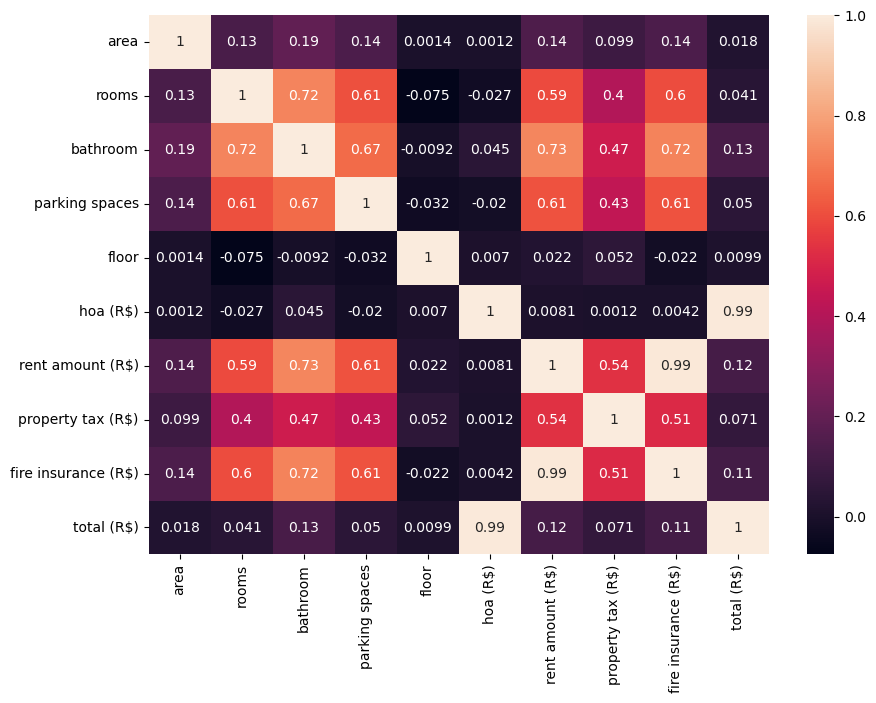

In [28]:
fig,ax = plt.subplots(figsize = (10,7))
corr = df1.corr()
sb.heatmap(corr,annot= True)
plt.show()

# INTERPRETATION:- This is a heatmap. It shows correlation of each column with other column in one go.By the color of the each box also indicates the correlation. With - symbol numbers are negatively correlated. Normal numbers are positively correlated. 1 is the strongly correlated.

# TASK-6 : PERFORM UNIVARIATE ANALYSIS AND ANALYZE DATA AND INTERPRETE IT.

# Univariate analysis

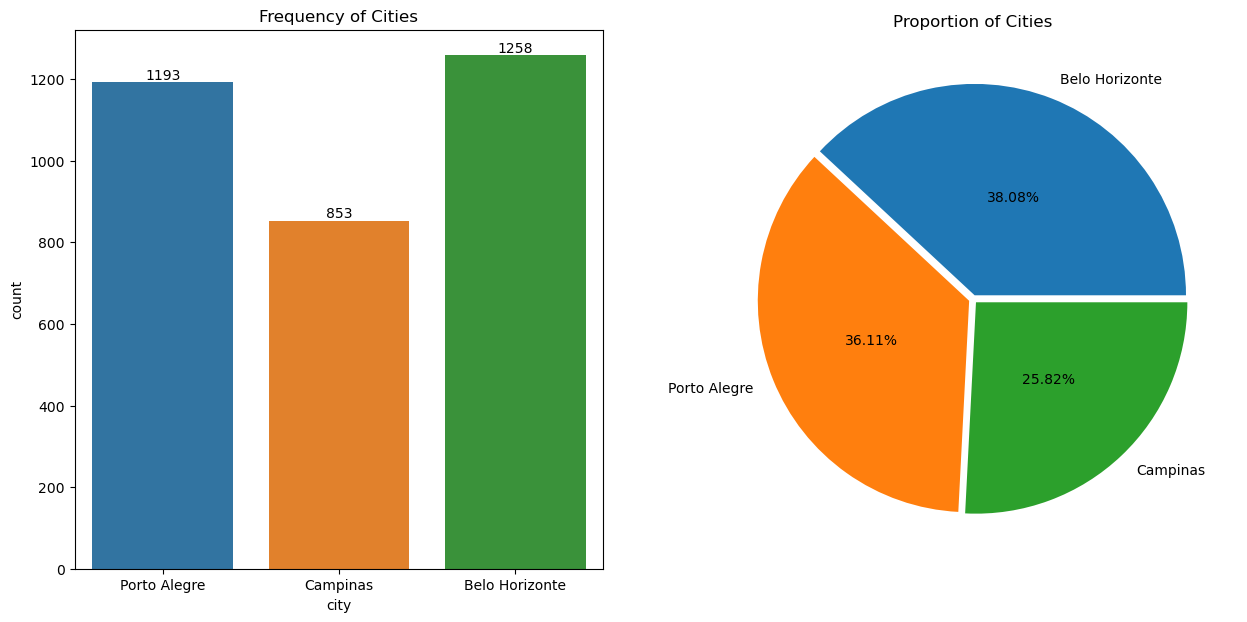

In [29]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
sb.countplot(x= df1['city'],ax = ax[0])
data = df1['city'].value_counts()
label = data.keys()
plt.pie(x = data,labels = label, autopct = '%0.2f%%',explode = [0.02,0.02,0.02], pctdistance = 0.5)
for bar in ax[0].patches:
    value = f'{round(bar.get_height(),2)}'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height()  
    ax[0].annotate(value,(x,y), va = 'bottom',ha = 'center')
    
ax[0].set_title('Frequency of Cities')
plt.title('Proportion of Cities')
plt.show()


# INTERPRETATION:-  From above two graphs the frequency of Belo Horizonte city has highest frequency with 38%. Campinas has lowest frequency with 25%

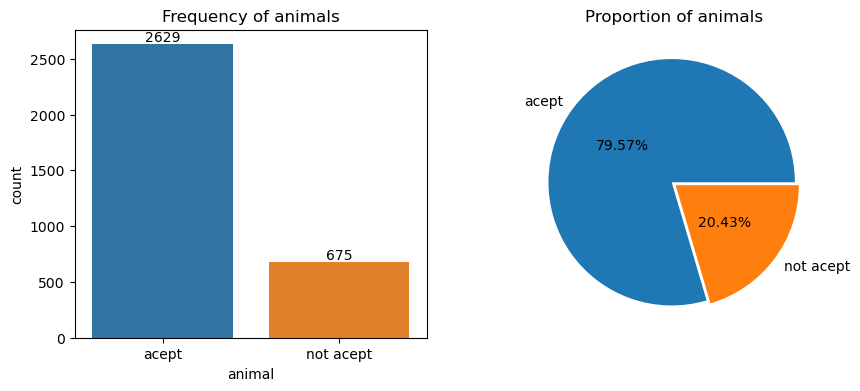

In [30]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
sb.countplot(x= df1['animal'],ax = ax[0])
data = df1['animal'].value_counts()
label = data.keys()
plt.pie(x = data,labels = label, autopct = '%0.2f%%',explode = [0.02,0.02], pctdistance = 0.5)
for bar in ax[0].patches:
    value = f'{round(bar.get_height(),2)}'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height()  
    ax[0].annotate(value,(x,y), va = 'bottom',ha = 'center')

ax[0].set_title('Frequency of animals')
plt.title('Proportion of animals')
plt.show()

# INTERPRETATION:- From above two graphs the frequency of accept animals has highest frequency with 80%. not acept animals has lowest frequency with 20%

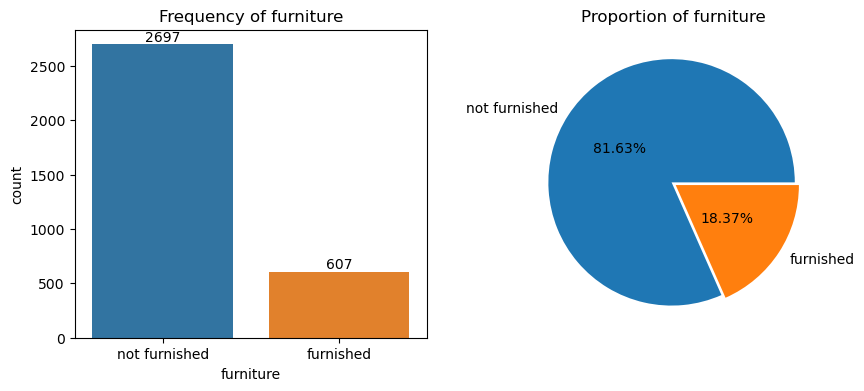

In [31]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
sb.countplot(x= df1['furniture'],ax = ax[0])
data = df1['furniture'].value_counts()
label = data.keys()
plt.pie(x = data,labels = label, autopct = '%0.2f%%',explode = [0.02,0.02], pctdistance = 0.5)
for bar in ax[0].patches:
    value = f'{round(bar.get_height(),2)}'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height()  
    ax[0].annotate(value,(x,y), va = 'bottom',ha = 'center')

ax[0].set_title('Frequency of furniture')
plt.title('Proportion of furniture')
plt.show()

# INTERPRETATION:- From above two graphs the frequency of not furniture has highest frequency with 81%. Furnished has lowest frequency with 19%

# TASK-7 : PERFORM BI-VARIATE ANALYSIS AND ANALYZE DATA AND INTERPRETE IT.

# bi-variate analysis

categorical-categorical

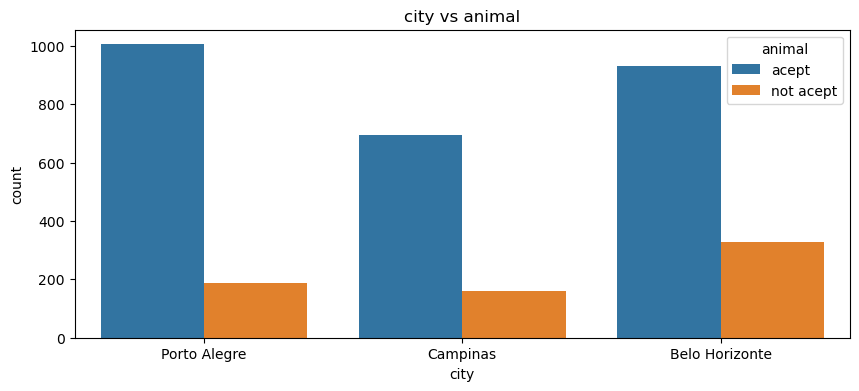

In [32]:
fig,ax = plt.subplots(figsize=(10,4))
ax.set_title('city vs animal')
sb.countplot(x= 'city',hue= 'animal', data = df1)
plt.show()

# INTERPRETATION:- In three cities animals acceptation count is high. so if the family have animals , there is no restriction for keeping it.

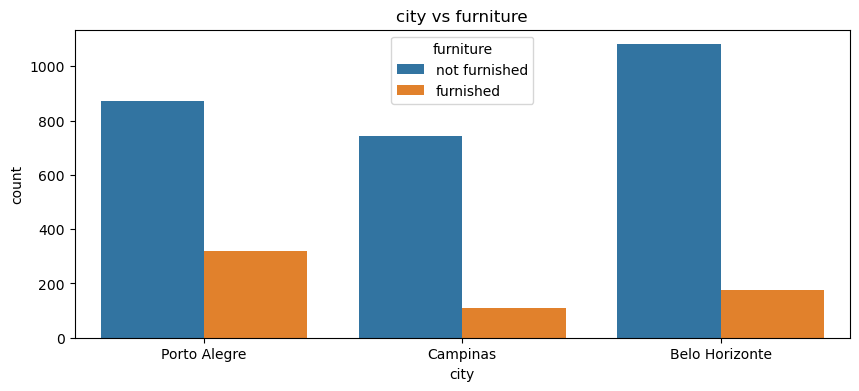

In [33]:
fig,ax = plt.subplots(figsize=(10,4))
ax.set_title('city vs furniture')
sb.countplot(x= 'city',hue= 'furniture', data = df1)
plt.show()

# INTERPRETATION:- In three cities not furnished is high. So most of the families live without furnished. It is best for middle families and Bachelors.Porto Alegre is the city with highest furnished city.

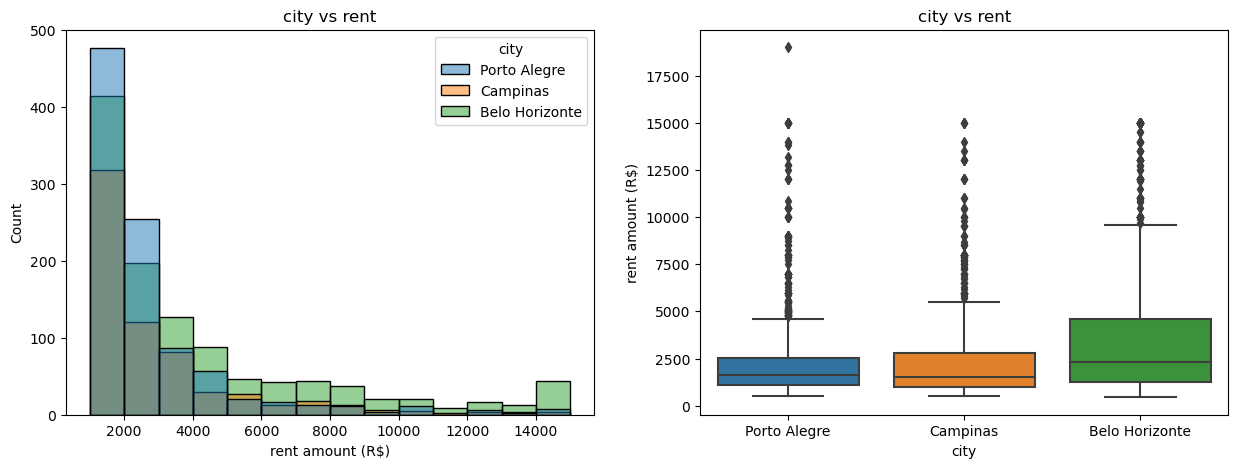

In [34]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('city vs rent')
ax[1].set_title('city vs rent')
bins = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000]
sb.histplot(x=df1['rent amount (R$)'], hue =df1['city'],ax=ax[0],bins=bins)
sb.boxplot(x=df1['city'], y =df1['rent amount (R$)'],ax=ax[1])
plt.show()

# outlier analysis

In [35]:
mean = int(df1['rent amount (R$)'].mean())
x = df1[(df1['rent amount (R$)']>5000)].index
print(x)
for index in x:
    df1.loc[index,'rent amount (R$)'] = mean

Int64Index([   15,    37,    57,    65,    91,    93,   107,   114,   143,
              200,
            ...
            10507, 10530, 10532, 10563, 10567, 10590, 10599, 10611, 10645,
            10656],
           dtype='int64', length=453)


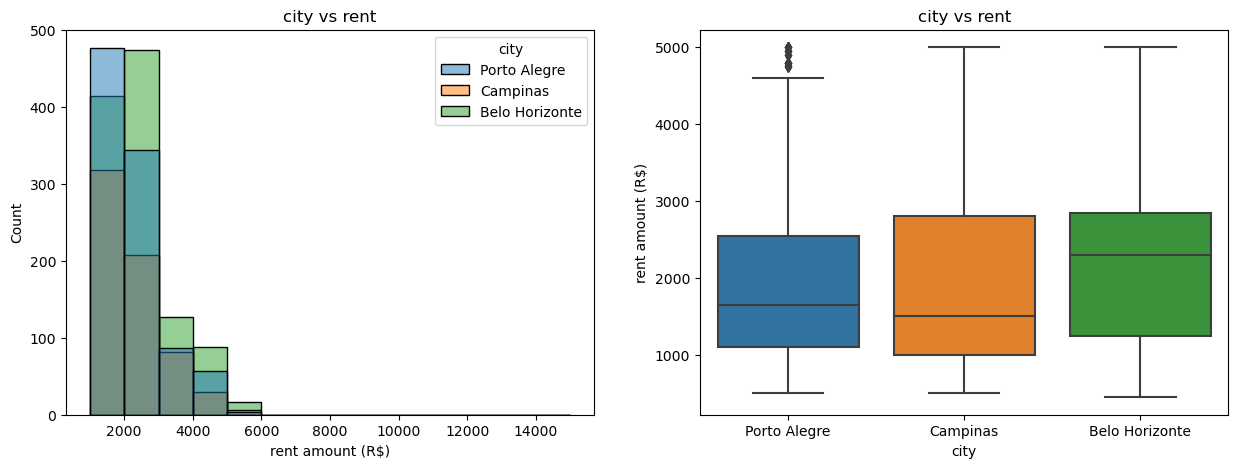

In [36]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('city vs rent')
ax[1].set_title('city vs rent')
bins = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000]
sb.histplot(x=df1['rent amount (R$)'], hue =df1['city'],ax=ax[0],bins=bins)
sb.boxplot(x=df1['city'], y =df1['rent amount (R$)'],ax=ax[1])
plt.show()

# INTERPRETATION:- After outlier analysis,city vs rent, the city 'Belo Horizoto ' have more spread that means it have high rental rates. 'Porto Alegre' have less spread means low rental rates from the box plot. Histogram is right skewed.

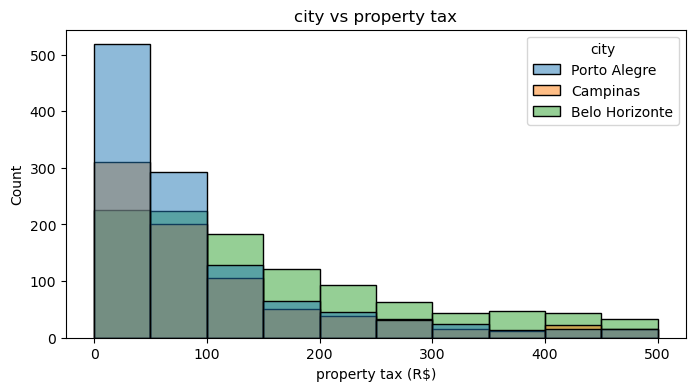

In [54]:
fig,ax = plt.subplots(figsize=(8,4))
ax.set_title('city vs property tax')
bins = [0,50,100,150,200,250,300,350,400,450,500]
sb.histplot(x=df1['property tax (R$)'], hue =df1['city'],bins=bins)
plt.show()

# INTERPRETATION:-Above Histogram is right skewed.Observing the histplot 0-100 property tax is in city 'porto alegre'. 100 above property tax is in the city 'Belo Horizonto'.In 'Campinas'city property tax is 400 nearly.

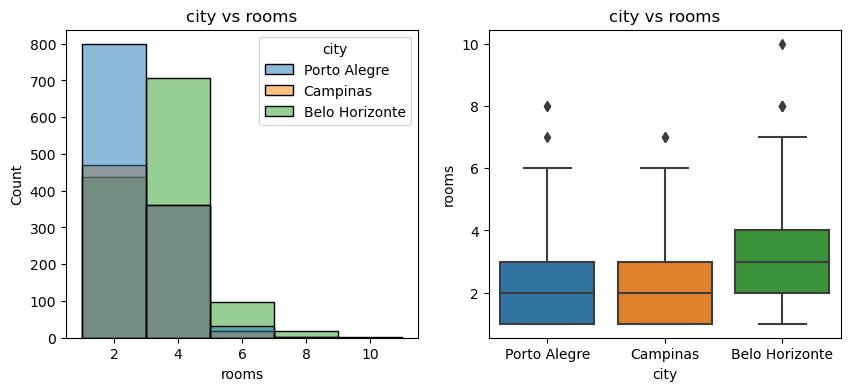

In [38]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
bins = [1,3,5,7,9,11]
ax[0].set_title('city vs rooms')
ax[1].set_title('city vs rooms')
sb.histplot(hue=df1['city'],x =df1['rooms'],ax=ax[0],bins = bins)
sb.boxplot(y=df1['rooms'], x =df1['city'],ax=ax[1])
plt.show()

# INTERPRETATION:-Above histogram is right skewed. Box plots have very few outliers. 1,2 rooms available  in the city 'porto alegre',more than two rooms are available in the city 'Belo Horizonto'

In [39]:
df2=df1.groupby(by=['city'])[['property tax (R$)']].mean()
df3=df1.groupby(by=['city'])[['area']].mean()
df4=df1.groupby(by=['city'])[['rent amount (R$)']].mean()
df5=df1.groupby(by=['city'])[['fire insurance (R$)']].mean()
df6=df1.groupby(by=['city'])[['total (R$)']].mean()
df7=df1.groupby(by=['city'])[['hoa (R$)']].mean()

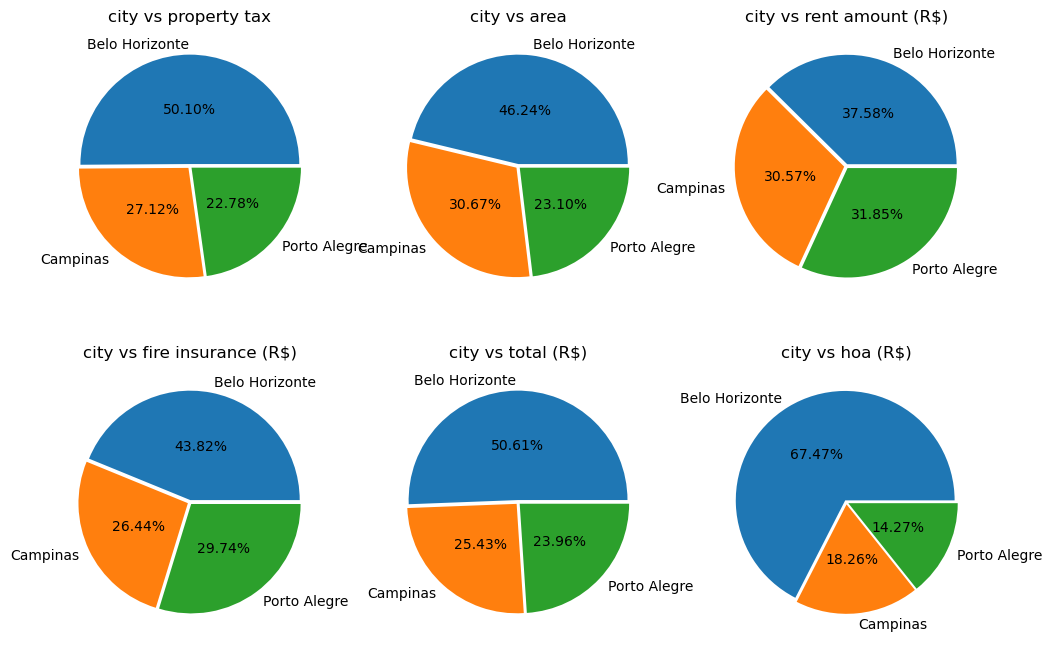

In [40]:
fig, ax = plt.subplots(2,3, figsize=(12,8))
d2 = df2['property tax (R$)']
ax[0,0].set_title('city vs property tax')
label = df2.index
ax[0,0].pie(x = d2,labels = label, autopct = '%0.2f%%',explode = [0.02,0.02,0.02], pctdistance = 0.5)
d2 = df3['area']
ax[0,1].set_title('city vs area')
label = df3.index
ax[0,1].pie(x = d2,labels = label, autopct = '%0.2f%%',explode = [0.02,0.02,0.02], pctdistance = 0.5)
d2 = df4['rent amount (R$)']
ax[0,2].set_title('city vs rent amount (R$)')
label = df4.index
ax[0,2].pie(x = d2,labels = label, autopct = '%0.2f%%',explode = [0.02,0.02,0.02], pctdistance = 0.5)
d2 = df5['fire insurance (R$)']
ax[1,0].set_title('city vs fire insurance (R$)')
label = df5.index
ax[1,0].pie(x = d2,labels = label, autopct = '%0.2f%%',explode = [0.02,0.02,0.02], pctdistance = 0.5)
d2 = df6['total (R$)']
ax[1,1].set_title('city vs total (R$)')
label = df6.index
ax[1,1].pie(x = d2,labels = label, autopct = '%0.2f%%',explode = [0.02,0.02,0.02], pctdistance = 0.5)
d2 = df7['hoa (R$)']
ax[1,2].set_title('city vs hoa (R$)')
label = df7.index
ax[1,2].pie(x = d2,labels = label, autopct = '%0.2f%%',explode = [0.02,0.02,0.02], pctdistance = 0.5)
plt.show()

# INTERPRETATION:-Above pie charts represents categorical- numerical columns, the city column with some important numerical columns. From observing all the above pie charts i concluded that the city 'Belo Horizonto' is apt for large families. The city 'Porto Alegre' is apt for bachelors, Remaining city 'Campinas' is apt for mid-families.

# TASK-8 : PERFORM MULTI-VARIATE ANALYSIS AND ANALYZE DATA AND INTERPRETE IT.

# Multivariate analysis

## According to above analysis, i filtered some data for Bachelors, Mid-families and Large families then choose one city for relocating.

# For bachelors

In [41]:
bachelor=df1[(df1['area']<110)&(df1['bathroom']==1)&(df1['rooms']==1)&(df1['rent amount (R$)']<1500)&(df1['total (R$)']<2140)
             &(df1['property tax (R$)']<59)]

In [42]:
bachelor

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
96,Campinas,44,1,1,0,7,acept,not furnished,350,550,12,7,919
100,Porto Alegre,50,1,1,1,1,acept,not furnished,350,950,50,14,1364
136,Campinas,44,1,1,0,3,acept,furnished,350,916,12,12,1290
162,Campinas,24,1,1,0,1,not acept,furnished,230,1180,9,15,1434
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10598,Porto Alegre,60,1,1,0,6,acept,furnished,300,1390,34,21,1745
10609,Campinas,53,1,1,1,8,not acept,not furnished,550,650,36,9,1245
10627,Belo Horizonte,22,1,1,0,0,acept,not furnished,30,450,13,6,499
10632,Porto Alegre,18,1,1,0,3,not acept,furnished,370,1090,0,16,1476


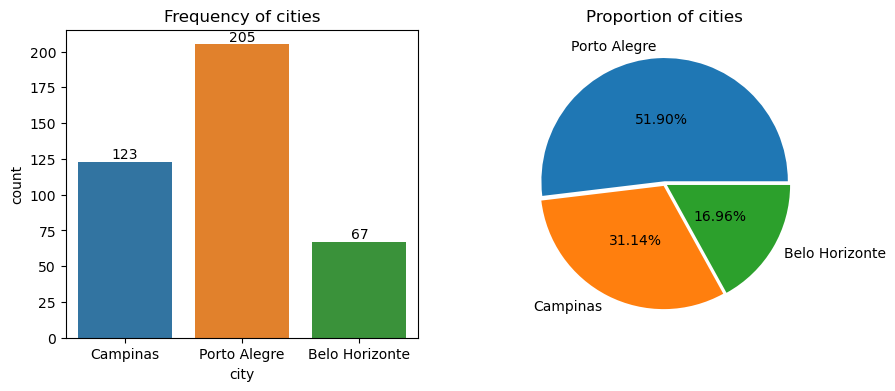

In [43]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
sb.countplot(x= bachelor['city'],ax = ax[0])
ax[0].set_title('Frequency of cities')
ax[1].set_title('Proportion of cities')
data = bachelor['city'].value_counts()
label = data.keys()
plt.pie(x = data,labels = label, autopct = '%0.2f%%',explode = [0.02,0.02,0.02], pctdistance = 0.5)
for bar in ax[0].patches:
    value = f'{round(bar.get_height(),2)}'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height()  
    ax[0].annotate(value,(x,y), va = 'bottom',ha = 'center')
plt.show()

# FINAL INTERPRETATION:- From above bar chart and pie chart the city *'Porto Alegre'* is the best for relocating bachelors.

# for middle families

In [44]:
mf=df1[(df1['area']>110)&(df1['area']<207)&(df1['bathroom']>1)&(df1['bathroom']<=2)&(df1['rooms']>2)&(df1['rooms']<=3)
       &(df1['rent amount (R$)']<2364)]
mf

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
312,Belo Horizonte,125,3,2,0,2,acept,not furnished,150,1200,69,16,1435
649,Campinas,205,3,2,1,2,acept,not furnished,950,2200,156,28,3334
937,Campinas,148,3,2,0,14,acept,not furnished,610,1700,102,22,2434
1257,Campinas,135,3,2,2,3,acept,not furnished,1100,2040,92,26,3258
1305,Belo Horizonte,120,3,2,2,2,acept,not furnished,150,1700,196,23,2069
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10067,Campinas,200,3,2,3,0,acept,not furnished,0,2000,153,31,2184
10250,Belo Horizonte,137,3,2,0,2,not acept,not furnished,0,2000,0,27,2027
10436,Belo Horizonte,130,3,2,0,0,acept,not furnished,0,2149,0,36,2185
10444,Belo Horizonte,120,3,2,2,3,not acept,not furnished,335,1300,166,18,1819


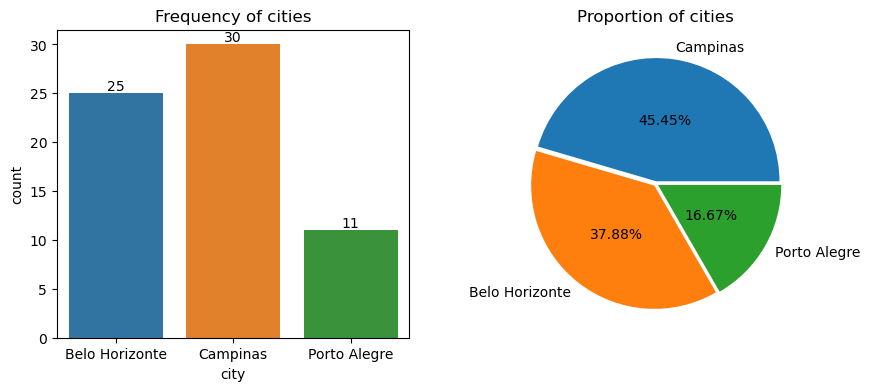

In [45]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
sb.countplot(x= mf['city'],ax = ax[0])
ax[0].set_title('Frequency of cities')
ax[1].set_title('Proportion of cities')
data = mf['city'].value_counts()
label = data.keys()
plt.pie(x = data,labels = label, autopct = '%0.2f%%',explode = [0.02,0.02,0.02], pctdistance = 0.5)
for bar in ax[0].patches:
    value = f'{round(bar.get_height(),2)}'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height()  
    ax[0].annotate(value,(x,y), va = 'bottom',ha = 'center')
plt.show()

# INTERPRETATION:- From above bar chart and pie chhart the city *'Campinas'* is the best for relocating mid-sized families.

# for large families

In [46]:
largefam=df1[(df1['area']>207)&(df1['bathroom']>2)&(df1['rooms']>3)&(df1['total (R$)']>6351)&(df1['rent amount (R$)']>2364)
             &(df1['floor']==0)]
largefam

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
15,Campinas,330,4,6,6,0,acept,furnished,680,2849,328,121,9129
91,Porto Alegre,350,4,4,4,0,acept,furnished,1,2849,359,160,9520
93,Belo Horizonte,296,4,3,2,0,acept,not furnished,0,2849,423,222,14150
143,Campinas,999,5,7,8,0,acept,not furnished,0,2849,667,211,14880
219,Belo Horizonte,420,4,4,2,0,not acept,not furnished,0,2849,200,115,7315
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10311,Belo Horizonte,300,4,3,4,0,acept,not furnished,0,2849,942,123,8565
10380,Campinas,800,4,7,4,0,acept,not furnished,2100,2849,1898,226,19220
10476,Porto Alegre,600,5,7,5,0,acept,not furnished,0,2849,834,125,7959
10507,Belo Horizonte,420,4,4,5,0,acept,not furnished,0,2849,0,148,9148


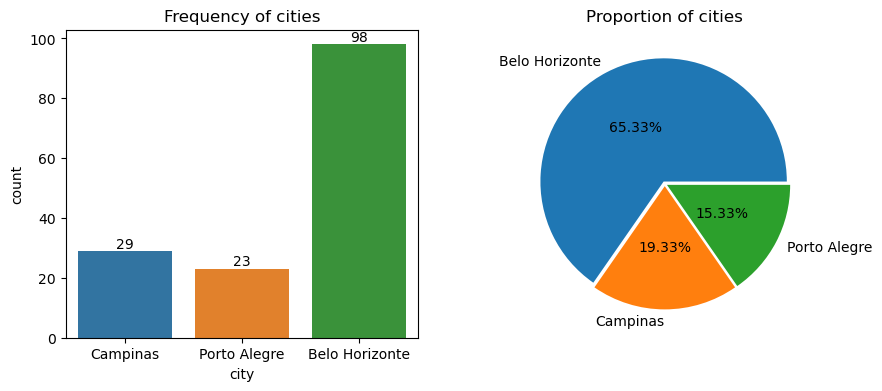

In [47]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
sb.countplot(x= largefam['city'],ax = ax[0])
ax[0].set_title('Frequency of cities')
ax[1].set_title('Proportion of cities')
data = largefam['city'].value_counts()
label = data.keys()
plt.pie(x = data,labels = label, autopct = '%0.2f%%',explode = [0.02,0.02,0.02], pctdistance = 0.5)
for bar in ax[0].patches:
    value = f'{round(bar.get_height(),2)}'
    x = bar.get_x() + bar.get_width()/2 
    y= bar.get_height()  
    ax[0].annotate(value,(x,y), va = 'bottom',ha = 'center')
plt.show()

# INTERPRETATION:- From above bar chart and pie chhart the city *'Belo Horizonte'* is the best for relocating large families.

<AxesSubplot:xlabel='city', ylabel='value'>

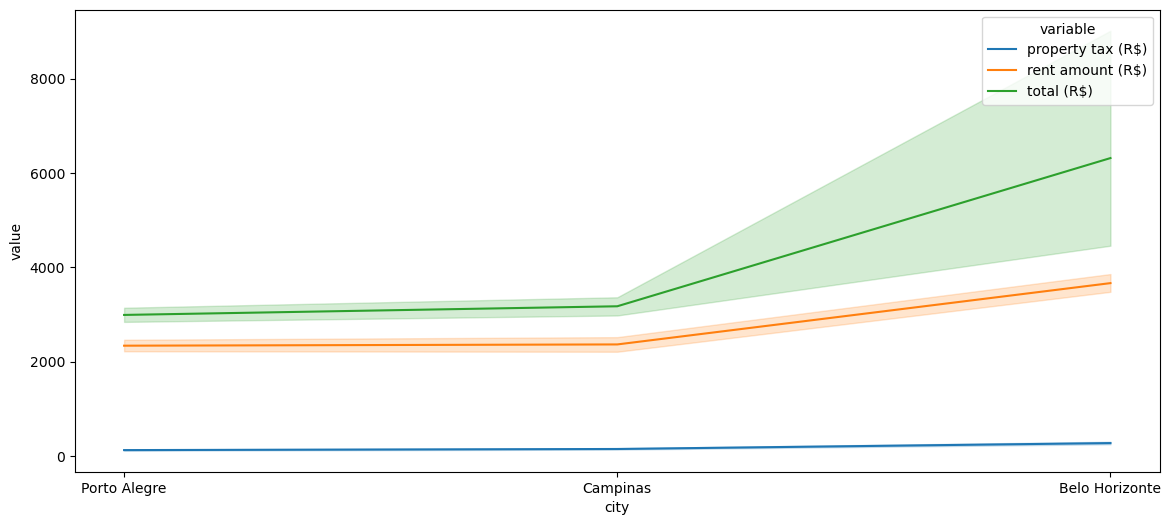

In [16]:
fig,ax = plt.subplots(figsize=(14,6))
meltdf = pd.melt(df1, id_vars = ['city'], value_vars = ['property tax (R$)','rent amount (R$)','total (R$)'],
                 var_name = 'variable',value_name = 'value')
sb.lineplot(x = 'city', hue = 'variable', y = 'value', data = meltdf  )

In [17]:
df1.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [18]:
continous

['area',
 'rooms',
 'bathroom',
 'parking spaces',
 'floor',
 'hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

<AxesSubplot:xlabel='city', ylabel='value'>

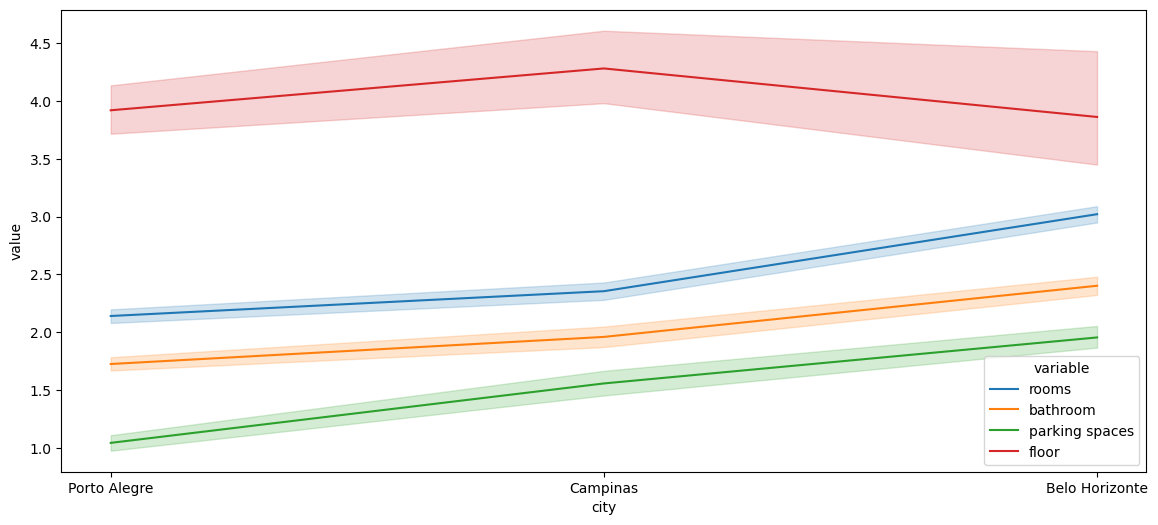

In [20]:
fig,ax = plt.subplots(figsize=(14,6))
meltdf = pd.melt(df1, id_vars = ['city'], value_vars = [
 'rooms',
 'bathroom',
 'parking spaces',
 'floor'], var_name = 'variable',value_name = 'value')
sb.lineplot(x = 'city', hue = 'variable', y = 'value', data = meltdf  )

In [5]:
df1.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

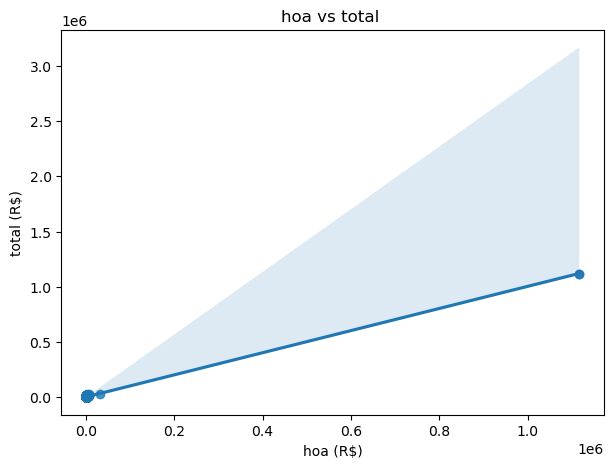

In [6]:
fig,ax = plt.subplots(figsize=(7,5))
ax.set_title('hoa vs total ')
sb.regplot(x=df1['hoa (R$)'], y =df1['total (R$)'])
plt.show()

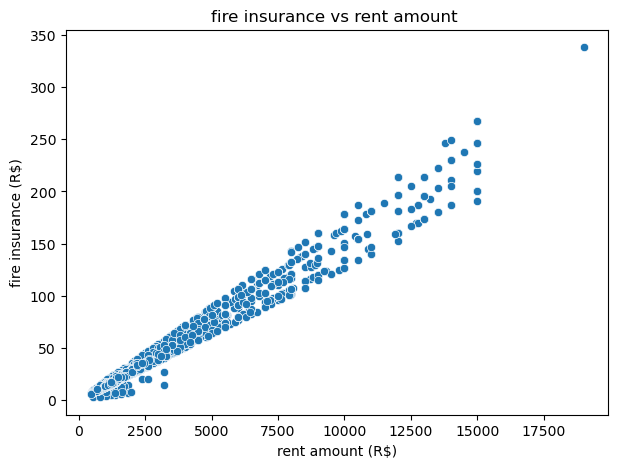

In [9]:
fig,ax = plt.subplots(figsize=(7,5))
ax.set_title('fire insurance vs rent amount ')
sb.scatterplot(x=df1['rent amount (R$)'], y =df1['fire insurance (R$)'])
plt.show()